In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
palette = {'all_kfold': 'tab:blue', 'ts': 'tab:orange', 'all_nested': 'tab:green', 'fs_nested_pt_kfold': 'tab:red', 'fs_kfold_pt_nested': 'tab:purple'}

In [3]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "overfitting/output*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in df.iloc[0:1,9:].columns.values])
df.rename(columns=new_names, inplace=True)

df = df[df['metric_accuracy'].notna()]
df

,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_reference_accuracy
0,svm,accuracy,0.04,rfe,0.4,ts,0.6,NaN,2,0.666667,0.679348
1,svm,accuracy,0.04,rfe,0.4,ts,0.6,NaN,2,0.666667,0.619565
2,svm,accuracy,0.04,rfe,0.4,ts,0.6,NaN,2,0.500000,0.532609
3,svm,accuracy,0.04,rfe,0.4,ts,0.6,NaN,2,0.583333,0.646739
4,svm,accuracy,0.04,rfe,0.4,ts,0.6,NaN,2,0.500000,0.690217
...,...,...,...,...,...,...,...,...,...,...,...
30319,logistic_regression,accuracy,0.50,rfe,1.0,all_kfold,NaN,NaN,13,0.831376,0.760870
30320,logistic_regression,accuracy,0.50,rfe,1.0,all_kfold,NaN,NaN,13,0.817545,0.760870
30321,logistic_regression,accuracy,0.50,rfe,1.0,all_kfold,NaN,NaN,13,0.812713,0.750000
30322,logistic_regression,accuracy,0.50,rfe,1.0,all_kfold,NaN,NaN,13,0.793388,0.755435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30300 entries, 0 to 30323
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model                      30300 non-null  object 
 1   main_metric                30300 non-null  object 
 2   sample_size                30300 non-null  float64
 3   feature_selector           30300 non-null  object 
 4   feature_selection_frac     30300 non-null  float64
 5   validation_type            30300 non-null  object 
 6   train_size                 12900 non-null  float64
 7   cv_split_size              12900 non-null  float64
 8   par_split_size             30300 non-null  int64  
 9   metric_accuracy            30300 non-null  float64
 10  metric_reference_accuracy  30300 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.8+ MB


In [5]:
data = df
data = data.reset_index()
pivoted_all = pd.wide_to_long(data, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted_all.reset_index(inplace=True)
pivoted_all = pivoted_all.drop('index', axis=1)
pivoted_all.rename(columns={'metric': 'metric_measurement'}, inplace=True)
r = pivoted_all['sample_size'] * 734
pivoted_all['sample_size'] = r
pivoted_all

,metric_type,train_size,model,feature_selection_frac,cv_split_size,sample_size,feature_selector,validation_type,main_metric,par_split_size,metric_measurement
0,accuracy,0.6,svm,0.4,NaN,29.36,rfe,ts,accuracy,2,0.666667
1,accuracy,0.6,svm,0.4,NaN,29.36,rfe,ts,accuracy,2,0.666667
2,accuracy,0.6,svm,0.4,NaN,29.36,rfe,ts,accuracy,2,0.500000
3,accuracy,0.6,svm,0.4,NaN,29.36,rfe,ts,accuracy,2,0.583333
4,accuracy,0.6,svm,0.4,NaN,29.36,rfe,ts,accuracy,2,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
60595,reference_accuracy,NaN,logistic_regression,1.0,NaN,367.00,rfe,all_kfold,accuracy,13,0.760870
60596,reference_accuracy,NaN,logistic_regression,1.0,NaN,367.00,rfe,all_kfold,accuracy,13,0.760870
60597,reference_accuracy,NaN,logistic_regression,1.0,NaN,367.00,rfe,all_kfold,accuracy,13,0.750000
60598,reference_accuracy,NaN,logistic_regression,1.0,NaN,367.00,rfe,all_kfold,accuracy,13,0.755435


Same metrics for varying, but reduced parameter split size OR varying feature selection frac for ts, kfold and nested; cv split size, trainsize fixed.

Here starts another section... fixed train size, cv split size and metric only accuracy.

In [6]:
acc_par_and_feature = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & ((pivoted_all['train_size'] == 0.8) | pivoted_all['train_size'].isna())
    & (pivoted_all['par_split_size'] == 13.0)
    & ((pivoted_all['cv_split_size'] == 13.0) | pivoted_all['cv_split_size'].isna())]

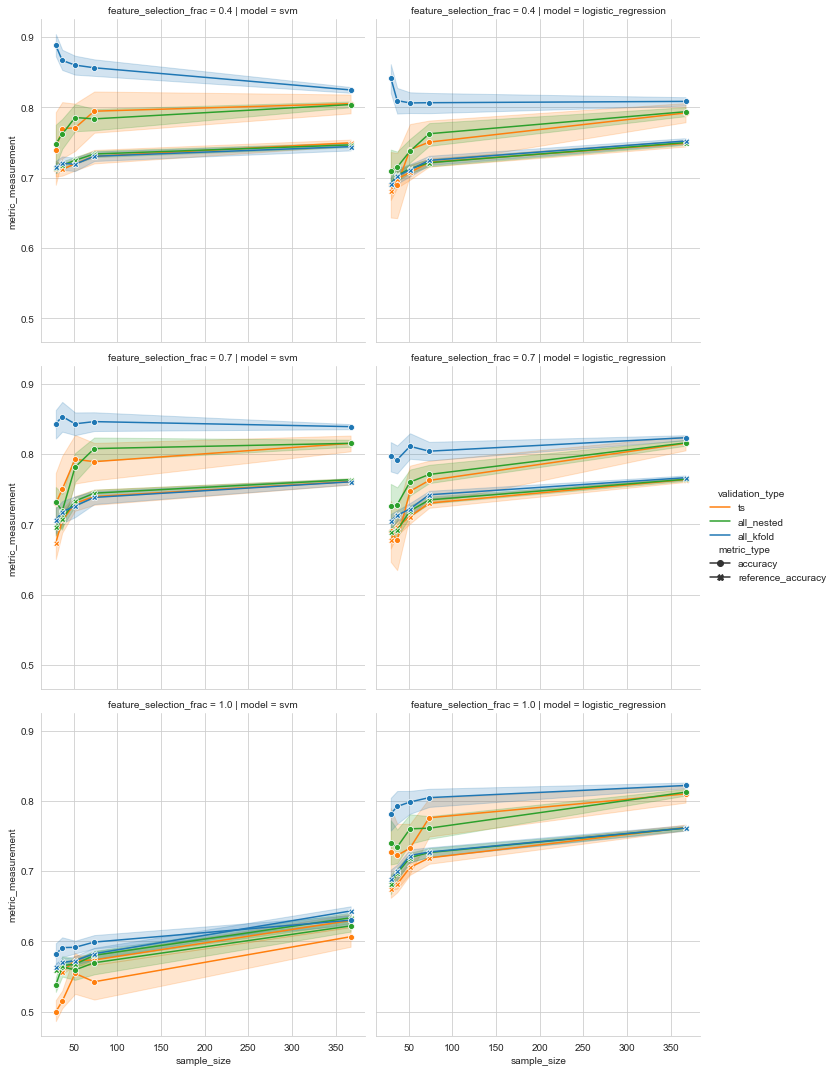

In [7]:
sns.relplot(x='sample_size', data=acc_par_and_feature, hue='validation_type', kind='line', y='metric_measurement', ci=95, col='model', row='feature_selection_frac', palette=palette, style='metric_type', markers=True, dashes=False)
plt.show()

In [8]:
acc_par_and_feature2 = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & ((pivoted_all['train_size'] == 0.8) | pivoted_all['train_size'].isna())
    & (pivoted_all['feature_selection_frac'] == 1.0)
    & (pivoted_all['par_split_size'] == 13.0)
    & ((pivoted_all['cv_split_size'] == 13.0) | pivoted_all['cv_split_size'].isna())]

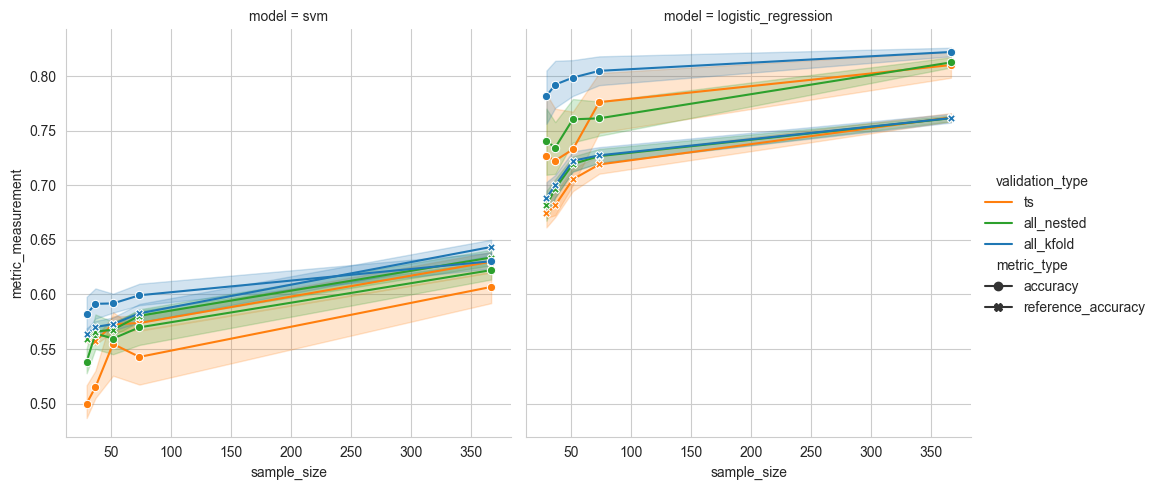

In [9]:
sns.relplot(x='sample_size', data=acc_par_and_feature2, hue='validation_type', kind='line', y='metric_measurement', ci=95, col='model', palette=palette, style='metric_type', markers=True, dashes=False)
plt.show()

Now train size in train test split for svm and lr

In [10]:
acc_train_size = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & (pivoted_all['validation_type'] == 'ts')
    & (pivoted_all['par_split_size'] == 13.0)
    & (pivoted_all['feature_selection_frac'] == 0.7)]

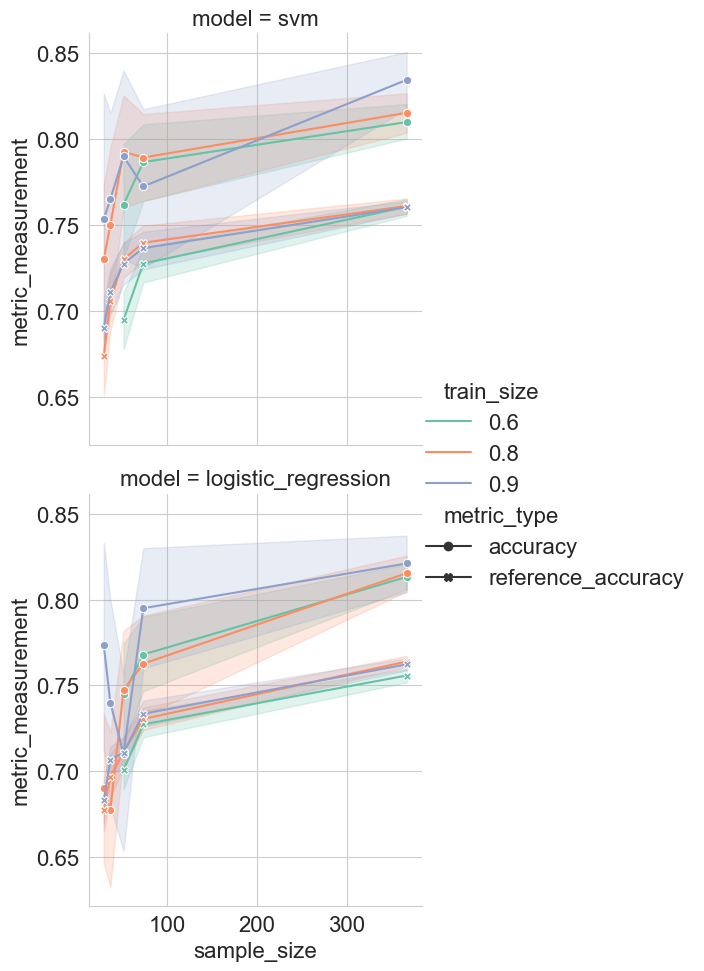

In [11]:
plt.rcParams.update({'font.size': 16})
sns.relplot(x='sample_size', data=acc_train_size, kind='line', y='metric_measurement', hue='train_size', ci=95, row='model',  style='metric_type', markers=True, dashes=False, palette='Set2')
plt.show()

Now varying cv split size for nested

In [12]:
acc_cv_split_size = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & (pivoted_all['validation_type'] == 'all_nested')
    & (pivoted_all['par_split_size'] == 7.0)
    & (pivoted_all['feature_selection_frac'] == 0.7)]

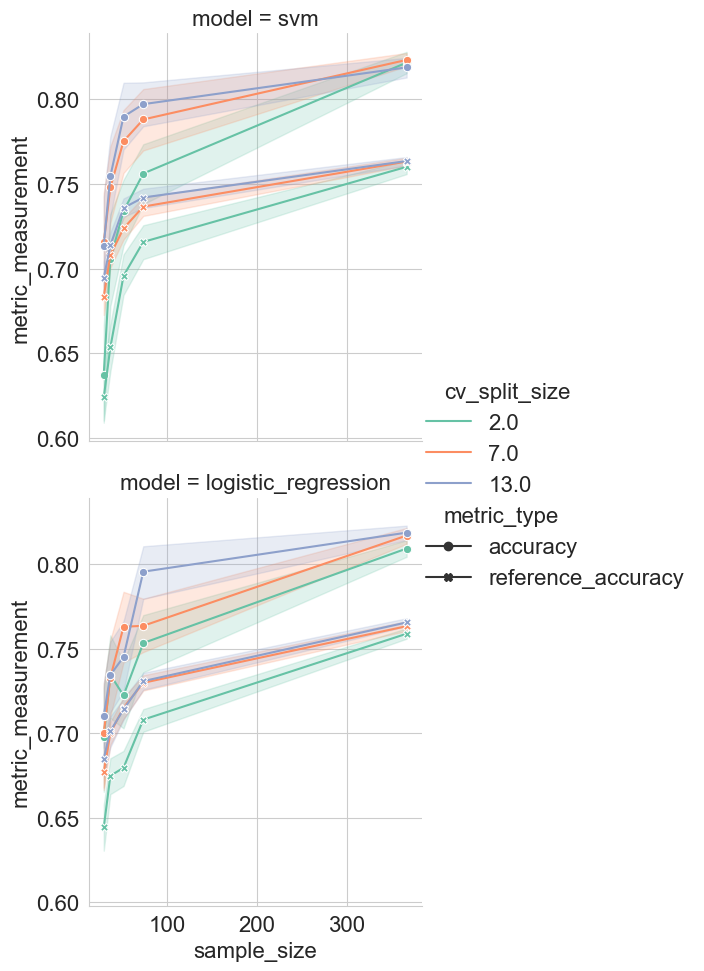

In [13]:
plt.rcParams.update({'font.size': 16})
sns.relplot(x='sample_size', data=acc_cv_split_size, hue='cv_split_size', kind='line', y='metric_measurement', ci=95, row='model', style='metric_type', markers=True, dashes=False, palette='Set2')
plt.show()